# Intro to Python

These notebooks have been made using Python 3. There are a lot of packages available and are easy to install from the terminal.

There is a great cheatsheet that compares the syntax used in python vs julia: [https://cheatsheets.quantecon.org/](https://cheatsheets.quantecon.org/).

Some tricks (keyboard shortcuts) for jupyter notebooks:
- **alt+enter** adds a new cell
- **shift+enter** runs current cell
- **ctrl+?** comments out code (#)
- **esc+M** change cell to markdown 
- **esc+Y** change cell to code

In [1]:
# Load some packages (if you get an error, you need to install the package in the terminal)
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import time
import seaborn as sns

Useful things:

In [2]:
np.ones(4) #array of ones
np.zeros(4) #array of zeros
np.ones(shape=(3,3)) # matrix of ones of dimension 3x3
print(np.zeros(shape = (3,3))) #matrix of zeros

np.linspace(0,1, 20) #start, stop, number (start and stop included)
print(np.arange(0,1, 0.1)) #start, stop, step (stop not included)
print(type(np.arange(0,1,0.1)))
np.random.rand() #uniform random (0,1)
np.random.rand(4) #array of uniform random
np.random.rand(3,3) #matrix of random uniform

np.random.randint(2,8, 5) # start, stop, array_length
np.random.randn() #standard normal

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
<class 'numpy.ndarray'>


0.02170205194332049

## Linear Algebra (hand-out 1)

Consider matrix $
M = \begin{pmatrix}
2 & 5 & 7 \\
6 & 1 & 8 \\
4 & 3 & 2
\end{pmatrix} \in R^{3 \times 3}
$

In [3]:
M=np.array([[2,5,7],[6,1,8], [4,3,2]]) #define a matrix 


print('shape = ',np.shape(M)) # we can return the shape of M

print('Indexing is from zero, M[0,0] =', M[0,0])

print('3rd column (M[:,2]) = ', M[:,2])

shape =  (3, 3)
Indexing is from zero, M[0,0] = 2
3rd column (M[:,2]) =  [7 8 2]


In [4]:
print('Element wise multiplication \n', M*M)

print('\nMatrix multiplication \n', np.dot(M,M))

print('\n Powers of matrix (M^5) \n', np.linalg.matrix_power(M, 5) )

# print('\n', [1,2,4]**5)

print('\n Matrix Exponential (exp(M)) \n', lg.expm(M))

Element wise multiplication 
 [[ 4 25 49]
 [36  1 64]
 [16  9  4]]

Matrix multiplication 
 [[62 36 68]
 [50 55 66]
 [34 29 56]]

 Powers of matrix (M^5) 
 [[ 94616  77164 125964]
 [ 99526  79387 132022]
 [ 67030  53839  88502]]

 Matrix Exponential (exp(M)) 
 [[ 67516.69711204  54414.75462058  89537.39741643]
 [ 70458.26454719  56785.52733505  93438.41557248]
 [ 47478.1135219   38264.75521623  62963.26269808]]


In [5]:
print('\n', M)

print('Transpose \n', M.T )

print('\n Determinant \n', np.linalg.det(M))

print('\n Trace \n', np.trace(M))

print('\n Inverse \n', np.linalg.inv(M))



 [[2 5 7]
 [6 1 8]
 [4 3 2]]
Transpose 
 [[2 6 4]
 [5 1 3]
 [7 8 2]]

 Determinant 
 154.0

 Trace 
 5

 Inverse 
 [[-0.14285714  0.07142857  0.21428571]
 [ 0.12987013 -0.15584416  0.16883117]
 [ 0.09090909  0.09090909 -0.18181818]]


In [6]:
evals, evecs = np.linalg.eig(M)

print('Eigenvalues \n', evals)

print('\n Corresponding eigenvectors \n', evecs)


Eigenvalues 
 [ 12.1402823   -3.8168496   -3.32343269]

 Corresponding eigenvectors 
 [[-0.62214694 -0.78554284 -0.8115636 ]
 [-0.64925286  0.56705623  0.04896917]
 [-0.43749732  0.24772905  0.58220834]]


Consider $Ax = b,$ 


For $
A = \begin{pmatrix}
2 & 5 \\
6 & 1 
\end{pmatrix} \in R^{2 \times 2}, \ b = \begin{pmatrix} 1 \\ 1 \end{pmatrix} \in \mathbb{R}^{2 \times 1}
$

In [7]:
A = [[2,5], [6,1]]
b = [1,1]
x = np.linalg.solve(A,b)
print('Solution is \n', x)

print('\n Check solution, Ax = \n', np.dot(A,x))

Solution is 
 [ 0.14285714  0.14285714]

 Check solution, Ax = 
 [ 1.  1.]


# Random Walks


## Simple Random Walk

**Defintion Simple Random Walk** - Let $x_1, ... \in \{-1,1\}$ be iid r.v with $\mathbb{P}[x_i = 1] = p, \mathbb{P}[x_i = -1] = q$. Then the sequence $Y_0, Y_1,...$ defined as $Y_0 = 0$ and $Y_n = \sum_{k=1}^{n} x_k$ is the simple random walk on $\mathbb{Z}$

<IPython.core.display.Javascript object>


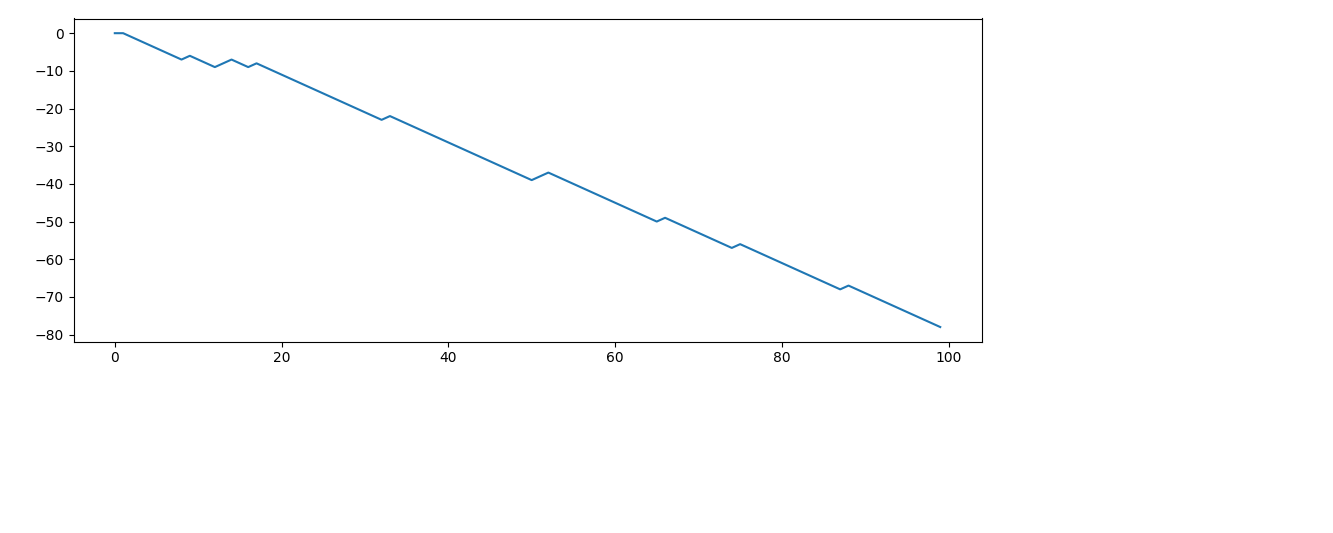

--- 18.05535888671875 seconds ---


In [8]:
#parameters 
p = 0.1
q = 1 - p
t = 0
tmax = 100
sum_x = 1 #initial starting place
y_0 = 0
time_plot=[t]
Y = [y_0]
%matplotlib notebook

start_time = time.time()

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)

plt.ion
plt.title('Simple Random Walk')

fig.show()
fig.canvas.draw()

while t <tmax:
    r = np.random.rand()
    if r<p:
        x = 1
    else:
        x = -1
    sum_x = sum_x + x
    
    ax.clear()
    ax.plot(time_plot, Y)
    t +=1
    Y.append(sum_x)
    time_plot.append(t)
    fig.canvas.draw()
    plt.xlabel('Time')
    plt.ylabel('state')
    plt.tight_layout()
    
print("--- %s seconds ---" % (time.time() - start_time))


Recall,

$\mathbb{E}[Y_n] = \mathbb{E}\left[ \sum_{k=1}^{n} x_k \right] = \sum_{k=1}^{n} = n(2p-1)$ 

and 

$ var[Y_n] = var\left[ \sum_{k=1}^{n} x_k \right] = \sum_{k=1}^{n} var[x_k] = 4np(1-p)$

We will run N simulations of a random walk and calculate numerically the average and deviations over the replications and compare this to the theoretical solution.

In [18]:
def SRW(p, tmax, N):
    q = 1-p
    X = np.random.rand(N,tmax)
#     print(X)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros((N,tmax))
    for i in range(0, N):
        X[i][0] = 0 #start at zero
        Y[i,:] = np.cumsum(X[i,:])
    return X, Y

In [19]:
tmax = 100
N_sim = 20
p = 0.1
S = SRW(p, tmax, N_sim)

Text(0.5, 0, 'Time')

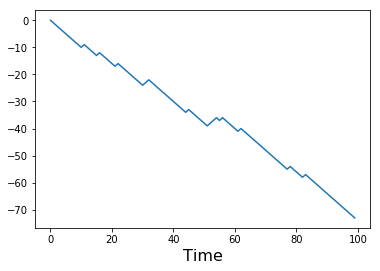

In [20]:
%matplotlib inline
plt.plot(range(tmax), S[1][0,:])
plt.xlabel('Time', fontsize = 16)

### Plots

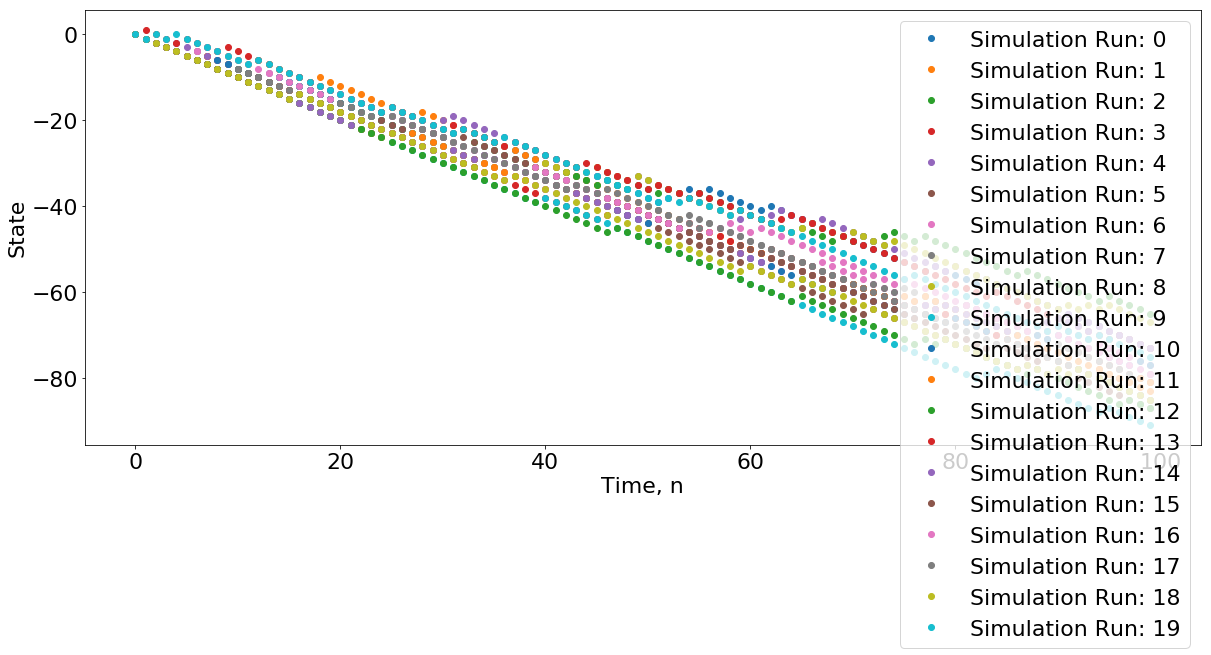

In [21]:
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)


plt.figure(figsize = (20,8))
for k in range(0, N_sim):
    plt.plot(range(tmax), S[1][k,:],'o', ms = 6, label ='Simulation Run: {}'.format(k)) #linestyle 'x'
    plt.xlabel('Time, n')
    plt.ylabel('State')
    plt.legend()

In [22]:
average = np.mean(S[1], axis = 0)
std = np.std(S[1], axis = 0)
theoretical_average = [n*(2*p-1) for n in range(tmax)]
theoretical_std = [np.sqrt(4*n*p*(1-p)) for n in range(tmax)]

In [23]:
theory_a = []
for n in range(tmax):
    theory_a.append(n*(2*p-1))

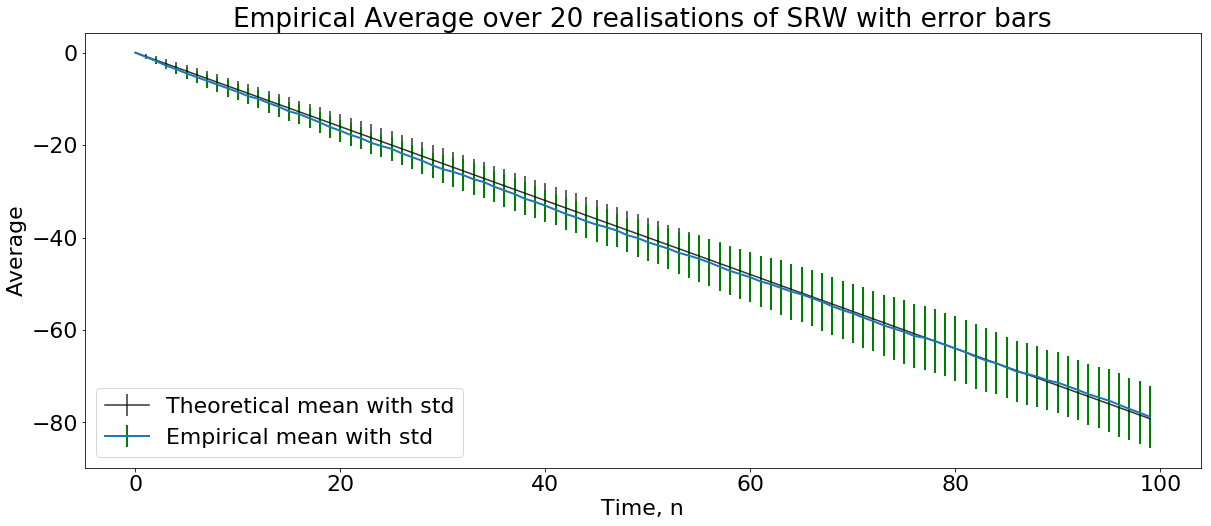

In [24]:
plt.figure(figsize = (20,8))
plt.errorbar(range(tmax), theoretical_average, yerr = theoretical_std, color = 'k', alpha = 0.8,  label = "Theoretical mean with std")
plt.errorbar(range(tmax), average, yerr = std, ecolor = 'green',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical Average over {} realisations of SRW with error bars".format(N_sim))
plt.xlabel("Time, n")
plt.ylabel("Average")
plt.legend(loc = 'lower left')
plt.savefig('empirical.pdf')

### Empirical Distribution at n = 10

It is possible to fit a Gaussian distribution to the histogram, using https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [25]:
tmax = 100
N_sim = 5000
p = 0.1
SS = SRW(p, tmax, N_sim)

(array([   49.,   276.,   786.,  1229.,  1226.,   869.,   392.,   126.,
           37.,    10.]),
 array([-97. , -92.8, -88.6, -84.4, -80.2, -76. , -71.8, -67.6, -63.4,
        -59.2, -55. ]),
 <a list of 10 Patch objects>)

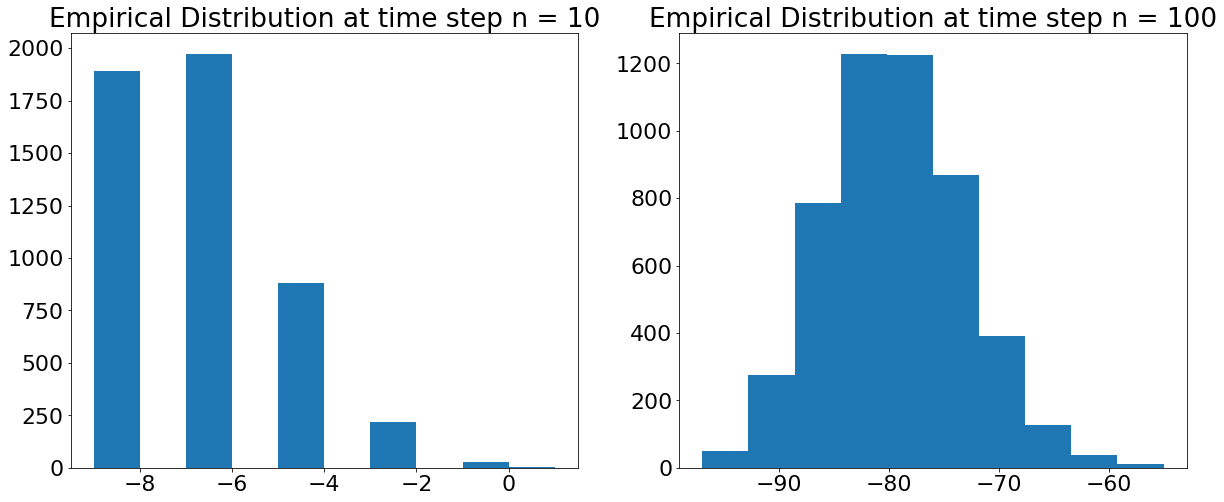

In [26]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.hist(SS[1][:,9])
# sns.distplot(SS[1][:,9],bins = 15, kde = False)
plt.title('Empirical Distribution at time step n = 10')

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 100')
# sns.distplot(SS[1][:,99],bins = len(np.unique(SS[1][:,99])))
plt.hist(SS[1][:,99])

# Problem Sheet 1 - Question 1.1

### Simulate the above SRW but change the boundary conditions to:

##### Periodic Boundary Conditions

You may want to use modulus for this (`%`)

##### Closed Boundary Conditions
